### Udacity - Nanoodegree Data Science Fundamentals I
### Investigating a Dataset - Titanic 

#### Suzana Barboza Carvalho

# 1. Introduction


The target of this project is to investigate the dataset available to Udacity with information from the Titanic passengers. As a class variable we have the survival ratio of each passenger.

As is common sense, it was reported in the film that children and women had priority to embark on rescue boats. From this I formulated 3 questions to study this database.

    - Has the gender influenced their survivability change?
    - Has the class of ticket purchased by the person influenced their survival change?
    - Has the age influenced their survival change?
    

This whole study is based on the above questions.

# 2. Settings

Import the required modules, read the dataset and visualize the same.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

df = pd.read_csv('titanic-data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Data Wrangling 

Deleting columns that are not required in this analysis

The age column has missing values and I chose to remove these lines for a better analysis of the third question proposed.

Then I transformed the discrete variable age into continuous variable

In [11]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], inplace=True)
df.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.9+ KB


In [13]:
dfAge = df.dropna(axis=0, subset=['Age'])


In [14]:
dfAge['age_group'] = pd.cut(dfAge.Age, [0, 10, 20, 40, 80])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# 4. Functions

Defining functions that can be use on this study

In [15]:
# Count occcurences of rows in dataset that fit the conditions
def countOccurrences(df, conditions):
    count = 0
    dfWithCondition = df
    for condition in conditions:
        dfWithCondition =  dfWithCondition[dfWithCondition[condition] == conditions[condition]]
    return dfWithCondition.shape[0]

# Calculate percentage
def getPercentage(numerator, denominator):
    return round((numerator/denominator)*100, 2)

# Plot Pie Chart
def getPieChart(sizes, labels, title):

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title(title)
    plt.show()

#Label in middle of the chart
def autolabel(ax, rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.5*height,
                height,
                ha='center', va='bottom', color = '#FFFFFF', fontweight='bold')
    
#Plot bar chart
def getBarChart(sizes, x, xlabel, ylabel, title):
    N = len(sizes)
    ind = np.arange(N)    # the x locations for the groups
    width = 0.4       # the width of the bars: can also be len(x) sequence

    p1 = plt.bar(ind, sizes, width)
    
    autolabel (plt, p1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.xticks(ind, (x))
   # plt.legend((p1[0], p2[0]), ('Men', 'Women'))

    plt.show()

#Plot bar chart with 2 bars side by side
def get2BarChart(sizes, x, xlabel, ylabel, title):
    groups = len(sizes[0])
    fig, ax = plt.subplots()
    index = np.arange(groups)
    bar_width = 0.4   

    female = ax.bar(index, sizes[0], bar_width,
               color='#BF3FBF',
                label='Female')
    
    male = ax.bar(index  + bar_width, sizes[1], bar_width,
                color='b', 
                label='Male')
    
    autolabel(ax, female)
    autolabel(ax, male)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    # x label position
    ax.set_xticks(index+(bar_width/2))
    ax.set_xticklabels((x))
    ax.legend()
    fig.tight_layout()
    plt.show()
    


# 5. First Question

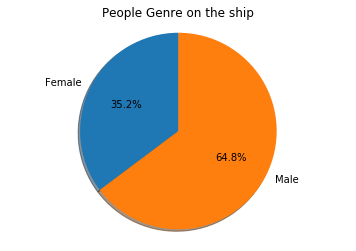

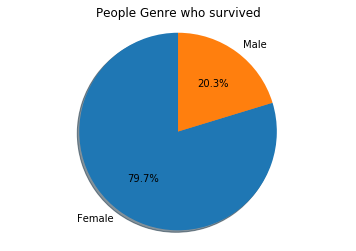

In [16]:
#count female and male
conditions = {'Sex': 'female'}
countFemale = countOccurrences(df, conditions)
conditions = {'Sex': 'male'}
countMale = countOccurrences(df, conditions)

#count female and male who survived
conditions = {'Sex': 'female', 'Survived': 1}
countFemaleSurvived = countOccurrences(df, conditions)
conditions = {'Sex': 'male', 'Survived': 1}
countMaleSurvived = countOccurrences(df, conditions)

#survival rate
pctFemale = getPercentage(countFemaleSurvived, countFemale)
pctMale =  getPercentage(countMaleSurvived, countMale)

#plot charts
labels = 'Female', 'Male'
sizes = countFemale, countMale
getPieChart(sizes, labels, 'People Genre on the ship')
sizes = pctFemale, pctMale
getPieChart(sizes, labels, 'People Genre who survived')

As we can see, the percentage of men on board the ship was significantly higher than women, about 65%.

However, the second chart shows that, of the survivors, approximately 80% were women.

Therefore, we can conclude from this specific database that the probability of survival for women was higher.

# 6. Second Question


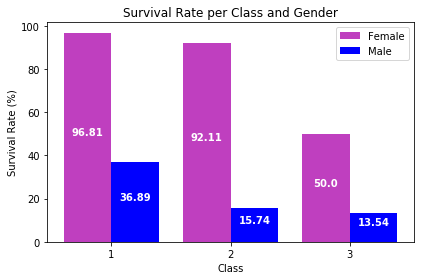

In [17]:
#gender grouped by class
countClassFemale = countOccurrences(df, {'Pclass': 1, 'Sex': 'female'}), countOccurrences(df, {'Pclass': 2, 'Sex': 'female'}), countOccurrences(df, {'Pclass': 3, 'Sex': 'female'})
countClassMale = countOccurrences(df, {'Pclass': 1, 'Sex': 'male'}), countOccurrences(df, {'Pclass': 2, 'Sex': 'male'}), countOccurrences(df, {'Pclass': 3, 'Sex': 'male'})

#gender grouped by class and survived
countClassSurvivedFemale = countOccurrences(df, {'Pclass': 1, 'Sex': 'female', 'Survived': 1}), countOccurrences(df, {'Pclass': 2, 'Sex': 'female', 'Survived': 1}), countOccurrences(df, {'Pclass': 3, 'Sex': 'female', 'Survived': 1})
countClassSurvivedMale = countOccurrences(df, {'Pclass': 1, 'Sex': 'male', 'Survived': 1}), countOccurrences(df, {'Pclass': 2, 'Sex': 'male', 'Survived': 1}), countOccurrences(df, {'Pclass': 3, 'Sex': 'male', 'Survived': 1})

#survival rate
pctFemale = getPercentage(countClassSurvivedFemale[0], countClassFemale[0]), getPercentage(countClassSurvivedFemale[1], countClassFemale[1]), getPercentage(countClassSurvivedFemale[2], countClassFemale[2])
pctMale = getPercentage(countClassSurvivedMale[0], countClassMale[0]), getPercentage(countClassSurvivedMale[1], countClassMale[1]), getPercentage(countClassSurvivedMale[2], countClassMale[2])

#plot bar chart
sizes = pctFemale, pctMale
pClass = '1', '2', '3'
get2BarChart(sizes, pClass, 'Class', 'Survival Rate (%)', 'Survival Rate per Class and Gender')

Based on the chart we can see that the survival rate was extremely high for women of first and second class . And the survival rate of first-class men was more than double than other classes.

So, we can conclude that the ticket class influenced the probability of people's survival

# 7. Third Question

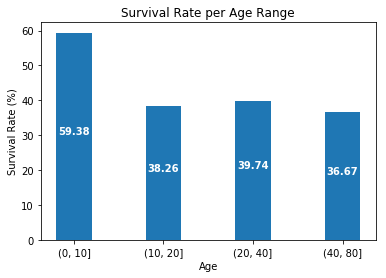

In [18]:
dfAge = dfAge.sort_values(by='age_group')
uniqueAge = dfAge.age_group.unique()

countAge = []
countAgeSurvived = []
#count for each age range
for ageRange in uniqueAge:
    countAge.append(countOccurrences(dfAge, {'age_group': ageRange}))
    countAgeSurvived.append(countOccurrences(dfAge, {'age_group': ageRange, 'Survived': 1}))

#get survival rate
pctAgeSurvived = []
for index in range(0, len(countAge)):
    pctAgeSurvived.append(getPercentage(countAgeSurvived[index], countAge[index]))



#plot chart
getBarChart(pctAgeSurvived, uniqueAge, 'Age', 'Survival Rate (%)', "Survival Rate per Age Range")


We can see that the survival rate of children between 0 and 10 years was significantly higher than other people. Thus, we conclude that children had a higher probability of survival.

# 8. Conclusion

We can see in this study that the probability of  women survival was significantly higher than men survival. In addition, passengers who were boarded in first class also had a better chance of survival. We can highlight that 96,81% of first class women survived.
Another interesting point is that children from 0 to 10 yearsalso had a higher probability of survival than other people.

# 9. Limitations

The accuracy of the third question in this study may have been affected by missing values on Age column. The decision was to remove rows where the column Age did not have values.

# 10. References

    https://www.kaggle.com/c/titanic/data
    https://www.quora.com/How-can-I-transform-continuous-values-into-categorical-variables-in-Python
    https://pandas.pydata.org/pandas-docs/stable/
    https://matplotlib.org/contents.html
    https://pt.stackoverflow.com/